## Chapter 2 Names and Values 

### 2.1 introduction 

* Quiz 

1) Given the following data frame, how do I create a new column called “3” that contains the sum of 1 and 2? You may only use $, not [[. What makes 1, 2, and 3 challenging as variable names? 

In [10]:
df <- data.frame(runif(3), runif(3))
names(df) <- c(1, 2)

In [11]:
df

1,2
0.5107584,0.8386475
0.2336431,0.4589030
0.4634631,0.8509293


In [12]:
df$3 <- df$1 + df$2

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected numeric constant
1: df$3
       ^


2) In the following code, how much memory does y occupy?

In [15]:
x <- runif(1e6)
y <- list(x, x, x)

In [18]:
object.size(y)

24000192 bytes

3) On which line does "a" get copied in the following example?

In [19]:
a <- c(1, 5, 3, 2)
b <- a
b[[1]] <- 10

In [ ]:
# both line 2 and 3? 

In [24]:
install.packages("lobstr")
library(lobstr)

Installing package into '/root/R_libs'
(as 'lib' is unspecified)
also installing the dependencies 'rlang', 'cpp11'



### 2.2 binding basics 

In [25]:
x <- c(1, 2, 3)

In [26]:
y <- x

In [28]:
obj_addr(x)
obj_addr(y)


[1] "0xf5a9030"

[1] "0xf5a9030"

In [29]:
_abc <- 1


ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected input
1: _
    ^


In [30]:
if <- 10

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected assignment
1: if <-
       ^


In [31]:
`_abc` <- 1
`_abc`

`if` <- 10
`if`


[1] 1

[1] 10

### 2.2.2 exercises 

In [32]:
# 1) 
a <- 1:10
b <- a
c <- b
d <- 1:10

In [35]:
# 2) 
obj_addr(mean)
obj_addr(base::mean)
obj_addr(get("mean"))
obj_addr(evalq(mean))
obj_addr(match.fun("mean"))


[1] "0x10929480"

[1] "0x10929480"

[1] "0x10929480"

[1] "0x10929480"

[1] "0x10929480"

In [38]:
#4) 
make.names(3)

[1] "X3"

In [41]:
make.names(_)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:12: unexpected input
1: make.names(_
               ^


In [42]:
make.names(if)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:14: unexpected ')'
1: make.names(if)
                 ^


In [43]:
make.names(_abc)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:12: unexpected input
1: make.names(_
               ^


In [44]:
.123e1 <- 10

ERROR: Error in 1.23 <- 10: invalid (do_set) left-hand side to assignment


In [45]:
make.names(.123e1)

[1] "X1.23"

In [46]:
?make.names

### 2.3 copy-on-modify 

In [47]:
x <- c(1, 2, 3)
y <- x

y[[3]] <- 4
x


[1] 1 2 3

In [48]:
x <- c(1, 2, 3)
cat(tracemem(x), "\n")

<0x5749fb0> 


In [49]:
y <- x
y[[3]] <- 4L

tracemem[0x5749fb0 -> 0xf3d0200]: eval eval withVisible withCallingHandlers doTryCatch tryCatchOne tryCatchList tryCatch try handle timing_fn evaluate_call evaluate doTryCatch tryCatchOne tryCatchList doTryCatch tryCatchOne tryCatchList tryCatch <Anonymous> handle_shell <Anonymous> <Anonymous> 


In [50]:
y[[3]] <- 5L

untracemem(x)

In [51]:
l1 <- list(1, 2, 3)

In [52]:
l2 <- l1

In [53]:
l2[[3]] <- 4

In [55]:
ref(l1, l2)

o [1:0x121cd6d0] <list> 
+-[2:0x13360da8] <dbl> 
+-[3:0x13360d78] <dbl> 
\-[4:0x13360d48] <dbl> 
 
o [5:0xf1975d8] <list> 
+-[2:0x13360da8] 
+-[3:0x13360d78] 
\-[6:0x150ca808] <dbl> 

### 2.3.6 exercises 

In [91]:
# 1
tracemem(1:10) # because tracemem only print out info when object is being copied, there is no copy here 

[1] "<0x13c94ec8>"

In [87]:
# 2
x <- c(1L, 2L, 3L) # binding to x
x
tracemem(x)
x[[3]] <- 4 # change 3rd element to 4 
untracemem(x)
x

[1] 1 2 3

[1] "<0xf25e7f8>"

tracemem[0xf25e7f8 -> 0xf256190]: eval eval withVisible withCallingHandlers doTryCatch tryCatchOne tryCatchList tryCatch try handle timing_fn evaluate_call evaluate doTryCatch tryCatchOne tryCatchList doTryCatch tryCatchOne tryCatchList tryCatch <Anonymous> handle_shell <Anonymous> <Anonymous> 
tracemem[0xf256190 -> 0x122457d0]: eval eval withVisible withCallingHandlers doTryCatch tryCatchOne tryCatchList tryCatch try handle timing_fn evaluate_call evaluate doTryCatch tryCatchOne tryCatchList doTryCatch tryCatchOne tryCatchList tryCatch <Anonymous> handle_shell <Anonymous> <Anonymous> 


[1] 1 2 4

In [76]:
x <- c(1, 2, 3)
tracemem(x)
y[[3]] <- 4


[1] "<0xf74cb08>"

In [88]:
x <- list(1:10)
x[[2]] <- x

In [90]:
x

[[1]]
 [1]  1  2  3  4  5  6  7  8  9 10

[[2]]
[[2]][[1]]
 [1]  1  2  3  4  5  6  7  8  9 10

### 2.4 object size 

In [93]:
obj_size(letters)
obj_size(ggplot2::diamonds)


1.5 kB

3.46 MB

In [95]:
x <- runif(1e6)
obj_size(x)

y <- list(x, x, x)
obj_size(y)


8 MB

8 MB

In [96]:
obj_size(list(NULL, NULL, NULL))


72 B

In [97]:
sessionInfo()

R version 3.4.4 (2018-03-15)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.5 LTS

Matrix products: default
BLAS: /usr/lib/libblas/libblas.so.3.6.0
LAPACK: /usr/lib/lapack/liblapack.so.3.6.0

locale:
[1] C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] lobstr_1.1.2

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1           magrittr_1.5         tidyselect_0.2.5    
 [4] munsell_0.5.0        uuid_0.1-2           colorspace_1.4-1    
 [7] R6_2.4.0             rlang_1.0.4          dplyr_0.8.0.1       
[10] plyr_1.8.4           tools_3.4.4          grid_3.4.4          
[13] gtable_0.2.0         cli_1.1.0            htmltools_0.3.6     
[16] lazyeval_0.2.2       assertthat_0.2.1     digest_0.6.18       
[19] tibble_2.1.1         crayon_1.3.4         IRdisplay_0.7.0     
[22] purrr_0.3.2          ggplot2_3.1.0        repr_0.19.2         
[25] base64enc_0.1-3      IRkernel_0.8.15.90

In [98]:
obj_size(1:3)
obj_size(1:1e3)
obj_size(1:1e6)
obj_size(1:1e9)
# !!! for this benefit, need to have R version > 3.5.1 

56 B

4.04 kB

4 MB

4 GB

In [99]:
y <- rep(list(runif(1e4)), 100)

object.size(y)
#> 8005648 bytes
obj_size(y)
#> 80,896 B

8004840 bytes

80.88 kB

In [101]:
# object.size() doesn’t account for shared elements within lists. Therefore, the results differ by a factor of ~ 100.

In [102]:
funs <- list(mean, sd, var)
obj_size(funs)
#> 17,608 B

16.87 kB

In [108]:
a <- runif(1e6)
obj_size(a) 


8 MB

In [109]:
b <- list(a, a)
obj_size(b) # similar to size of a 
obj_size(a, b) # 


8 MB

8 MB

In [110]:
b[[1]][[1]] <- 10
obj_size(b) 
obj_size(a, b) 


16 MB

16 MB

In [113]:
b[[2]][[1]] <- 10 # identical 
obj_size(b)
obj_size(a, b)

16 MB

24 MB

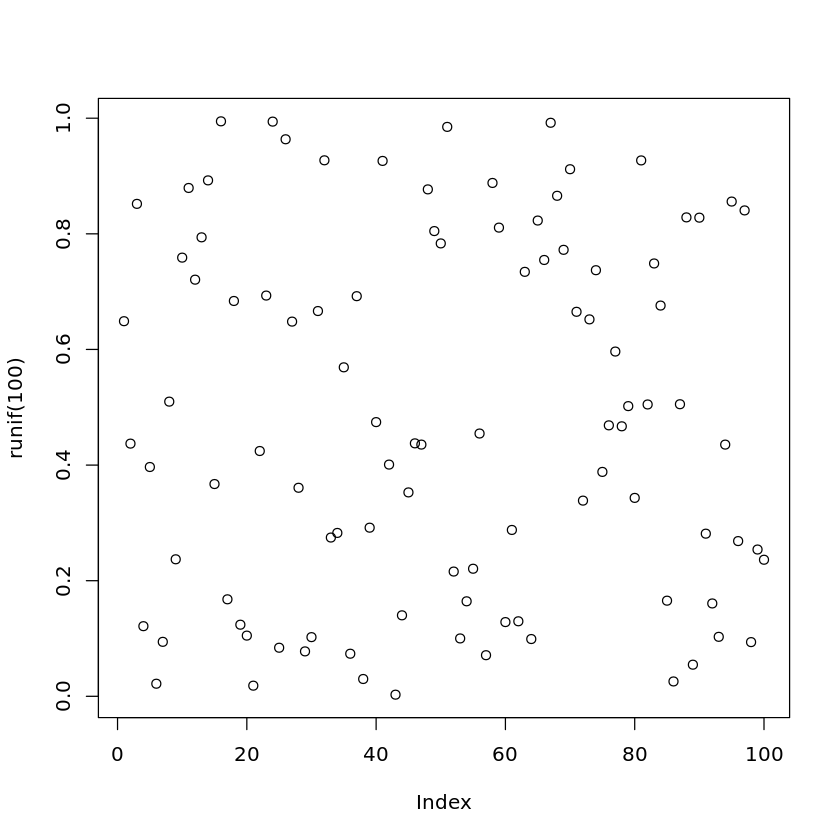

In [117]:
plot(runif(100))

In [119]:
x <- data.frame(matrix(runif(5 * 1e4), ncol = 5))
medians <- vapply(x, median, numeric(1))
head(x)

X1,X2,X3,X4,X5
0.7494041,0.29952666,0.9923325,0.7254792,0.4385251
0.9390155,0.54839617,0.6385386,0.7416056,0.8162512
0.3767621,0.12761092,0.3211573,0.5640514,0.2826295
0.1593245,0.22042751,0.9609860,0.8622441,0.5501628
0.1066856,0.34057479,0.3556174,0.4933283,0.7985722
0.9238035,0.03564455,0.5786496,0.9408145,0.4155291


In [120]:
head(medians)

X1        X2        X3        X4        X5 
0.5051650 0.4923572 0.5068406 0.5030715 0.4987431

In [121]:
for (i in seq_along(medians)) {
  x[[i]] <- x[[i]] - medians[[i]]
}

In [124]:
cat(tracemem(x), "\n")

for (i in 1:5) {
  x[[i]] <- x[[i]] - medians[[i]]
}

untracemem(x)

<0x1231e2b8> 
tracemem[0x1231e2b8 -> 0x15039610]: eval eval withVisible withCallingHandlers doTryCatch tryCatchOne tryCatchList tryCatch try handle timing_fn evaluate_call evaluate doTryCatch tryCatchOne tryCatchList doTryCatch tryCatchOne tryCatchList tryCatch <Anonymous> handle_shell <Anonymous> <Anonymous> 
tracemem[0x15039610 -> 0x15039678]: [[<-.data.frame [[<- eval eval withVisible withCallingHandlers doTryCatch tryCatchOne tryCatchList tryCatch try handle timing_fn evaluate_call evaluate doTryCatch tryCatchOne tryCatchList doTryCatch tryCatchOne tryCatchList tryCatch <Anonymous> handle_shell <Anonymous> <Anonymous> 
tracemem[0x15039678 -> 0x15039748]: [[<-.data.frame [[<- eval eval withVisible withCallingHandlers doTryCatch tryCatchOne tryCatchList tryCatch try handle timing_fn evaluate_call evaluate doTryCatch tryCatchOne tryCatchList doTryCatch tryCatchOne tryCatchList tryCatch <Anonymous> handle_shell <Anonymous> <Anonymous> 
tracemem[0x15039748 -> 0x15039818]: eval eval with

In [125]:
y <- as.list(x)
cat(tracemem(y), "\n")
#> <0x7f80c5c3de20>
  
for (i in 1:5) {
  y[[i]] <- y[[i]] - medians[[i]]
}
#> tracemem[0x7f80c5c3de20 -> 0x7f80c48de210]: 

<0x15011430> 
tracemem[0x15011430 -> 0x1513a8c8]: eval eval withVisible withCallingHandlers doTryCatch tryCatchOne tryCatchList tryCatch try handle timing_fn evaluate_call evaluate doTryCatch tryCatchOne tryCatchList doTryCatch tryCatchOne tryCatchList tryCatch <Anonymous> handle_shell <Anonymous> <Anonymous> 


In [126]:
e <- rlang::env()
tracemem(e)

ERROR: Error in tracemem(e): 'tracemem' is not useful for promise and environment objects
